In [1]:
from io import BytesIO

import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import matplotlib.pyplot as plt
import hvplot.pandas
import matplotlib.gridspec as gridspec
import matplotlib



In [2]:
cm = 1/2.54  # centimeters in inches

In [3]:
def get_number_of_rows(dataframe):
    df = pd.read_csv(dataframe)
    return df.shape[0]

In [4]:
import os
path = '../data'
files = os.listdir(path)
path_files = [path + '/'+ string for string in files]
number_of_rows = [get_number_of_rows(dataframe) for dataframe in path_files]
#dict_values = [(file_name, n_rows) for file_name, n_rows in zip(path_files, number_of_rows) ]
file_entries = dict(zip(files,path_files))
file_rows = dict(zip(path_files,number_of_rows))


In [5]:
file_rows

{'../data/20220928-193156_JigsawPuzzle.csv': 1279,
 '../data/20221003-131623_JigsawPuzzle.csv': 2560,
 '../data/20220930-180439_JigsawPuzzle.csv': 4778,
 '../data/20221003-134004_JigsawPuzzle.csv': 1928,
 '../data/20221003-132953_JigsawPuzzle.csv': 2724,
 '../data/20221003-132653_JigsawPuzzle.csv': 3461,
 '../data/20221003-175958_JigsawPuzzle.csv': 3395,
 '../data/20221004-114501_JigsawPuzzle.csv': 11129,
 '../data/20221013-141842_JigsawPuzzle.csv': 1729,
 '../data/20221020-150106_JigsawPuzzle.csv': 4208,
 '../data/20221020-162555_JigsawPuzzle.csv': 1640,
 '../data/20221020-162057_JigsawPuzzle.csv': 6395,
 '../data/20221109-144049_JigsawPuzzle.csv': 2090,
 '../data/20221123-173640_JigsawPuzzle.csv': 4413,
 '../data/20221207-162655_JigsawPuzzle.csv': 2423,
 '../data/20221215-153434_JigsawPuzzle.csv': 1709,
 '../data/20221215-153316_JigsawPuzzle.csv': 1220,
 '../data/test.csv': 2724,
 '../data/test1.csv': 1933,
 '../data/.~lock.20221004-114501_JigsawPuzzle.csv#': 0,
 '../data/.~lock.2022

In [6]:
def iqr(array):
    q3, q1 = np.percentile(array,[75,25])
    IQR = q3 - q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR
    return lower_bound, upper_bound

In [7]:
select = pn.widgets.Select(options=file_entries)

@pn.cache
def fetch_data(url):
    df = pd.read_csv(url)
    df.drop('time', axis = 1, inplace = True)
    df.insert(0,'time',df.index.values)
    df = df.fillna(0)
    for column in df.keys():
        lower_bound, upper_bound =iqr(df[column].to_numpy())
        df = df[df[column] > lower_bound ]
        df = df[df[column] < upper_bound ]


    return df

select_df = pn.Column(select, pn.bind(pn.widgets.Tabulator, pn.bind(fetch_data, select), page_size=10))

In [8]:
@pn.cache
def plot(df = None, limb = 'shoulder',direction = 'l', color_0 = 'goldenrod',color_1 = 'coral'):
    data = fetch_data(df)    
    fig  = plt.figure(num=1, clear=True, figsize=(25*cm, 15*cm))
    spec = fig.add_gridspec(ncols=2, nrows=2)
    ax0 = fig.add_subplot(spec[0, :])
    ax0.plot(data[limb + "L" + "angle"],color = '#005bec')
    ax0.plot(data[limb + "R" + "angle"],color = '#ec00c0')
    ax0.set_title(limb + "L" + "angle & "+limb +"R" + "angle")

    ax0.set_facecolor("#e8de8d")

    ax1 = fig.add_subplot(spec[1, 0])
    ax1.set_facecolor("#e8de8d")
    ax1.set_title(limb + "L" + "angle")
    ax1.plot(data[limb + "L" + "angle"],color = '#005bec')
    ax2 = fig.add_subplot(spec[1, 1])
    ax2.set_facecolor("#efd7d7")
    ax2.set_title(limb + "R" + "angle")
    ax2.plot(data[limb + "R" + "angle"], color = '#ec00c0')



    return fig


## Tabs

In [9]:
columns = ['shoulder','elbow','knee','hip']
select_column = pn.widgets.Select(options=columns)
direction = ['l','r']
select_direction =  pn.widgets.Select(options=direction)

main_widget = pn.bind(plot, select,select_column,select_direction)

In [10]:
@pn.cache
def boxplot(df = None, limb = 'shoulder',direction = 'l', color_0 = 'goldenrod',color_1 = 'coral'):
    data = fetch_data(df)
    fig1,ax1  = plt.subplots(num=1, figsize=(5*cm, 5*cm))
    ax1.set_title(limb + direction + " angle boxplot")
    ax1.boxplot(data[limb+direction.upper()+"angle"])
    return fig1

boxplot_widget = pn.bind(boxplot, select)
    

## Create the Template

Launching server at http://localhost:43309


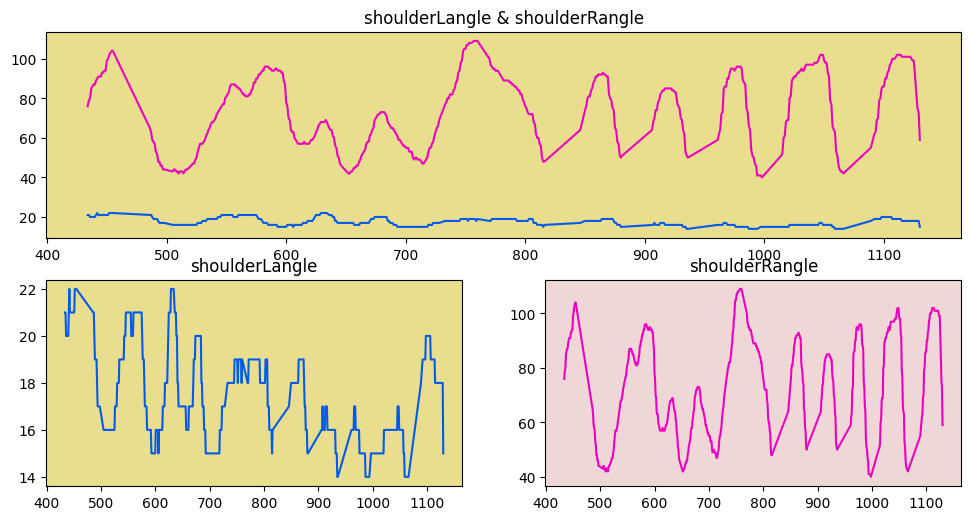

In [11]:
#Layout using Template
template = pn.template.BootstrapTemplate(
    title='Data analysis for motor disabilities rehabilitation of the upper limbs using augmented reality', 
    sidebar=[pn.pane.Markdown(""), 
             pn.pane.Markdown("## Choose the dataframe"), 
             select,select_column
            ],
    main= [pn.Row(main_widget)],
    accent_base_color="#45d8b1",
    header_background="#5608b0",
)
template.show()
template.servable();